# Workflows

`NiSpace` incorporates very detailed and customizable functionality to perform colocalization analyses. However, to provide an quick-and-easy access, we defined "workflow" functions that perform complete colocalization pipelines with only one command. These include:

`nispace.workflows.simple_colocalization()`:  
"Does a map of interest colocalize with a reference dataset?" (permutation of maps)

`nispace.workflows.group_comparison()`:  
"Do brain alteration pattern relative to a control cohort colocalize with a reference dataset?" (permutation of groups)

`nispace.workflows.simple_xsea()`:  
"Is the (average) colocalization with a specific set of reference maps higher than if these sets were randomly drawn from a larger "population" of maps?" ("X-Set Enrichment Analysis", permutation of sets)


In [1]:
# monkey patch to make progress bars show as ASCII instead of as widgets
import tqdm.notebook
tqdm.notebook.tqdm = tqdm.tqdm

## Simple colocalization

The simplest case would be: You have a group-level results map, for example a SPM t-contrast map, and are interested in whether this map (i.e., the group or session differences) is associated with neurotransmitter receptor distributions.
The workflow function `simple_colocalization()` will take your results map and a reference dataset of neurotransmitter receptor maps as input, return the colocalization statistics including non-parametric p values, and visualize the results. Internally, this is just calling the individual `NiSpace` functions in order.

Here, we use an ENIGMA cortical thickness effect size map (Cohen's d) from a schizophrenia case-control comparisons as our input ("target") map. ENIGMA data are available in the 68-parcel cortical Desikan-Killiany parcellation. Of note, this would also work when passing a 2d dataframe is input (i.e., parcels in the columns, and different maps in the rows). It also works with a list of images as input.

We could, but do not have to, pass pre-loaded reference data to `simple_colocalization()`. With `x = "pet"`, it will automatically call `fetch_reference("pet")` internally. A collection can be passed through `x_collection`, defaulting to `"UniqueTracers"`.

In [2]:
from nispace.datasets import fetch_example
from nispace.workflows import simple_colocalization

# get the example
example_enigma = fetch_example("enigma")
example_enigma = example_enigma.loc["SCZ"]
print("A pd.Series with SCZ-vs.-control effect sizes for 68 Desikan-Killiany parcels:")
display(example_enigma)

# run the analysis, plot=True will directly plot the result
colocs, p_values, q_values, nsp_object = simple_colocalization(
    x="PET",
    y=example_enigma,
    z="gm", # don't control for anything on map-level
    parcellation="DesikanKilliany",
    colocalization_method="spearman", # can be any allowed method
    n_perm=10000, # 10k permutations, this is the default
    n_proc=-1, # number of processes, defaults to 1
    seed=42, # seed for reproducibility
    plot=False, # don't plot for now
)

INFO | 12/06/24 12:15:30 | nispace: Loading example dataset: enigma
INFO | 12/06/24 12:15:30 | nispace: The enigma dataset was parcellated using the DesikanKilliany parcellation.
A pd.Series with SCZ-vs.-control effect sizes for 68 Desikan-Killiany parcels:


L_bankssts                  -0.352
L_caudalanteriorcingulate   -0.119
L_caudalmiddlefrontal       -0.363
L_cuneus                    -0.203
L_entorhinal                -0.203
                             ...  
R_supramarginal             -0.386
R_frontalpole               -0.207
R_temporalpole              -0.236
R_transversetemporal        -0.262
R_insula                    -0.406
Name: SCZ, Length: 68, dtype: float64

INFO | 12/06/24 12:15:30 | nispace: Using integrated parcellation DesikanKilliany.
INFO | 12/06/24 12:15:30 | nispace: Loading integrated pet dataset as X data.
INFO | 12/06/24 12:15:30 | nispace: Using collection UniqueTracers.
INFO | 12/06/24 12:15:30 | nispace: Loading pet maps.
INFO | 12/06/24 12:15:30 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/pet/collection-UniqueTracers.json.
INFO | 12/06/24 12:15:30 | nispace: Loading parcellated data: DesikanKilliany

The NiSpace "PET" dataset is based on openly available nuclear imaging maps from various independent sources.
The accompanying metadata table contains detailed information about tracers, source samples, original publications and data 
sources, as well as the publication licenses. The licenses determine in which contexts the maps can be used. Every map, 
except for those with a "free" or "CC0 1.0" license, must be cited when used. The responsibility for this lies with the user!
We additionall

Parcellating (-1 proc): 100%|██████████| 1/1 [00:00<00:00, 70.35it/s]


INFO | 12/06/24 12:15:32 | nispace: Combined across images, 0 parcels had only background intensity and were set to nan (indices: []).
INFO | 12/06/24 12:15:32 | nispace: Got 'z' data for 1 x 68 parcels.
INFO | 12/06/24 12:15:32 | nispace: Z-standardizing 'X' data.
INFO | 12/06/24 12:15:32 | nispace: Z-standardizing 'Z' data.
INFO | 12/06/24 12:15:32 | nispace: *** NiSpace.colocalize() - Estimating X & Y colocalizations. ***
INFO | 12/06/24 12:15:32 | nispace: Running 'spearman' colocalization.
INFO | 12/06/24 12:15:32 | nispace: Will regress Z from Y before colocalization calculation.
INFO | 12/06/24 12:15:32 | nispace: Found equal number of Z and Y maps. Will perform map-wise regression.


Colocalizing (spearman, -1 proc): 100%|██████████| 1/1 [00:00<00:00, 1308.68it/s]


INFO | 12/06/24 12:15:38 | nispace: *** NiSpace.permute() - Estimate exact non-parametric p values. ***
INFO | 12/06/24 12:15:38 | nispace: Permutation of: X maps.
INFO | 12/06/24 12:15:38 | nispace: Loading observed colocalizations (method = 'spearman').
INFO | 12/06/24 12:15:38 | nispace: Generating permuted X maps.
INFO | 12/06/24 12:15:38 | nispace: No null maps found.
INFO | 12/06/24 12:15:38 | nispace: Generating null maps (n = 10000, null_method = 'moran').
INFO | 12/06/24 12:15:38 | nispace: Null map generation: Assuming n = 26 data vector(s) for n = 68 parcels.
INFO | 12/06/24 12:15:38 | nispace: Using provided distance matrix/matrices.


Moran null maps (-1 proc): 100%|██████████| 26/26 [00:00<00:00, 451.76it/s]


INFO | 12/06/24 12:15:40 | nispace: Null data generation finished.
INFO | 12/06/24 12:15:40 | nispace: Z-standardizing null maps.


Null colocalizations (spearman, -1 proc): 100%|██████████| 10000/10000 [00:04<00:00, 2298.38it/s]


INFO | 12/06/24 12:15:46 | nispace: Calculating exact p-values (tails = {'rho': 'two'}).
INFO | 12/06/24 12:15:46 | nispace: *** NiSpace.correct_p() - Correct p values for multiple comparisons. ***
INFO | 12/06/24 12:15:46 | nispace: Returning colocalizations: 
| METHOD   | XSEA  | X_REDUCTION | Y_TRANSFORM | 
| spearman | False | False       | False       | 
INFO | 12/06/24 12:15:46 | nispace: Returning p values: 
| METHOD   | PERMUTE_WHAT | XSEA  | MC_METHOD | NORM  | X_REDUCTION | Y_TRANSFORM | 
| spearman | xmaps        | False | None      | False | False       | False       | 
INFO | 12/06/24 12:15:46 | nispace: Returning p values: 
| METHOD   | PERMUTE_WHAT | XSEA  | MC_METHOD | NORM  | X_REDUCTION | Y_TRANSFORM | 
| spearman | xmaps        | False | fdrbh     | False | False       | False       | 


Results will be 2d dataframes with Spearman coefficients, p-values, and q-values. The dataframes will have shape (1,n_parcels) as we passed one map only. We concatenate them for nice display:

In [3]:
import pandas as pd

# concatenate
simple_results = pd.concat([colocs, p_values, q_values], keys=["rho", "p", "q"])
# reorder levels
simple_results = simple_results.reorder_levels([1,0]).sort_index()
# show
display(simple_results.head(5))

set                                             General   
map     target-CBF_tracer-asl_n-31_dx-hc_pub-holiga2018   
SCZ p                                          0.905200  \
    q                                          0.905200   
    rho                                        0.039452   

set                                                          
map     target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2016   
SCZ p                                              0.88640  \
    q                                              0.90520   
    rho                                            0.01821   

set                                                            
map     target-HDAC_tracer-martinostat_n-8_dx-hc_pub-wey2016   
SCZ p                                             0.777200    \
    q                                             0.841967     
    rho                                           0.065636     

set                                            Immunity   
map     target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018   
SCZ p                                          0.771600  \
    q                                          0.841967   
    rho                                       -0.058815   

set                                                      
map     target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020   
SCZ p                                         0.611200  \
    q                                         0.841967   
    rho                                       0.078759   

set                                                Glutamate   
map     target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smart2019   
SCZ p                                             0.287600    \
    q                                             0.696800     
    rho                                          -0.179874     

set                                                           
map     target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic2021   
SCZ p                                             0.037000   \
    q                                             0.696800    
    rho                                          -0.461504    

set                                                       GABA   
map     target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lukow2022   
SCZ p                                             0.084600      \
    q                                             0.696800       
    rho                                          -0.176053       

set                                                                  
map     target-GABAa_tracer-flumazenil_n-16_dx-hc_pub-norgaard2020   
SCZ p                                             0.294800          \
    q                                             0.696800           
    rho                                          -0.167327           

set                                                          Dopamine  ...   
map     target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-garciagomez2018  ...   
SCZ p                                              0.14540             ...  \
    q                                              0.69680             ...   
    rho                                           -0.21136             ...   

set                                                   Serotonin   
map     target-5HT4_tracer-sb207145_n-59_dx-hc_pub-beliveau2017   
SCZ p                                             0.274400       \
    q                                             0.696800        
    rho                                          -0.369497        

set                                                                     
map     target-5HT6_tracer-gsk215083_n-30_dx-hc_pub-radhakrishnan2018   
SCZ p                                             0.129600             \
    q                                             0.696800              
    rho                                          -0.303862              

set                                                            
map     t

Okay, let's look at the lowest p values for schizophrenia:

In [4]:
simple_results.T.sort_values(by=("SCZ", "p"))

SCZ   
                                                                                 p   
set                     map                                                          
Glutamate               target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic...  0.0370  \
GABA                    target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lu...  0.0846   
Opiods/Endocannabinoids target-MU_tracer-carfentanil_n-204_dx-hc_pub-ka...  0.0966   
Serotonin               target-5HT6_tracer-gsk215083_n-30_dx-hc_pub-rad...  0.1296   
Dopamine                target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-g...  0.1454   
Opiods/Endocannabinoids target-CB1_tracer-omar_n-77_dx-hc_pub-normandin...  0.1728   
Serotonin               target-5HT2a_tracer-cimbi36_n-29_dx-hc_pub-beli...  0.2150   
Dopamine                target-D2_tracer-flb457_n-55_dx-hc_pub-sandiego...  0.2464   
Serotonin               target-5HT4_tracer-sb207145_n-59_dx-hc_pub-beli...  0.2744   
Glutamate               target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smar...  0.2876   
GABA                    target-GABAa_tracer-flumazenil_n-16_dx-hc_pub-n...  0.2948   
Actylcholine            target-A4B2_tracer-flubatine_n-30_dx-hc_pub-hil...  0.3446   
Serotonin               target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv...  0.4032   
Dopamine                target-D1_tracer-sch23390_n-13_dx-hc_pub-kaller...  0.5194   
Serotonin               target-5HTT_tracer-dasb_n-100_dx-hc_pub-belivea...  0.5232   
                        target-5HT1b_tracer-p943_n-65_dx-hc_pub-gallezo...  0.5626   
Dopamine                target-DAT_tracer-fpcit_n-174_dx-hc_pub-dukart2018  0.5812   
Immunity                target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020      0.6112   
Actylcholine            target-VAChT_tracer-feobv_n-18_dx-hc_pub-aghour...  0.6446   
Histamine               target-H3_tracer-gsk189254_n-8_dx-hc_pub-gallez...  0.7140   
Actylcholine            target-M1_tracer-lsn3172176_n-24_dx-hc_pub-naga...  0.7252   
Noradrenaline           target-NET_tracer-mrb_n-77_dx-hc_pub-ding2010       0.7626   
Immunity                target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018     0.7716   
General                 target-HDAC_tracer-martinostat_n-8_dx-hc_pub-we...  0.7772   
                        target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2016  0.8864   
                        target-CBF_tracer-asl_n-31_dx-hc_pub-holiga2018     0.9052   

                                                                                       
                                                                                   q   
set                     map                                                            
Glutamate               target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic...  0.696800  \
GABA                    target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lu...  0.696800   
Opiods/Endocannabinoids target-MU_tracer-carfentanil_n-204_dx-hc_pub-ka...  0.696800   
Serotonin               target-5HT6_tracer-gsk215083_n-30_dx-hc_pub-rad...  0.696800   
Dopamine                target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-g...  0.696800   
Opiods/Endocannabinoids target-CB1_tracer-omar_n-77_dx-hc_pub-normandin...  0.696800   
Serotonin               target-5HT2a_tracer-cimbi36_n-29_dx-hc_pub-beli...  0.696800   
Dopamine                target-D2_tracer-flb457_n-55_dx-hc_pub-sandiego...  0.696800   
Serotonin               target-5HT4_tracer-sb207145_n-59_dx-hc_pub-beli...  0.696800   
Glutamate               target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smar...  0.696800   
GABA                    target-GABAa_tracer-flumazenil_n-16_dx-hc_pub-n...  0.696800   
Actylcholine            target-A4B2_tracer-flubatine_n-30_dx-hc_pub-hil...  0.746633   
Serotonin               target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv...  0.806400   
Dopamine                target-D1_tracer-sch23390_n-13_dx-hc_pub-kaller...  0.841967   
Serotonin               target-5HTT_tracer-dasb_n-100_dx-hc_pub-belivea...  0.841967   


We find the strongest colocalization between cortical thickness changes in SCZ and the NMDA glutamateric receptor distribution. 
The colocalization is negative, i.e., regions with negative effect sizes (SCZ < controls) have a high concentration of NMDA receptors. However, it is only marginally significant relative to null maps with a similar degree of spatial autocorrelation.

We can visualize this result with `NiSpace` by calling `.plot("categorical")` on the `NiSpace` instance returned by the workflow function:  
(bars are colocalization values, grey shades are the percentiles of the null distribution)

INFO | 12/06/24 12:15:46 | nispace: *** NiSpace.plot() - Plot colocalization results. ***
INFO | 12/06/24 12:15:48 | nispace: Creating categorical plot for method spearman, colocalization stat rho.


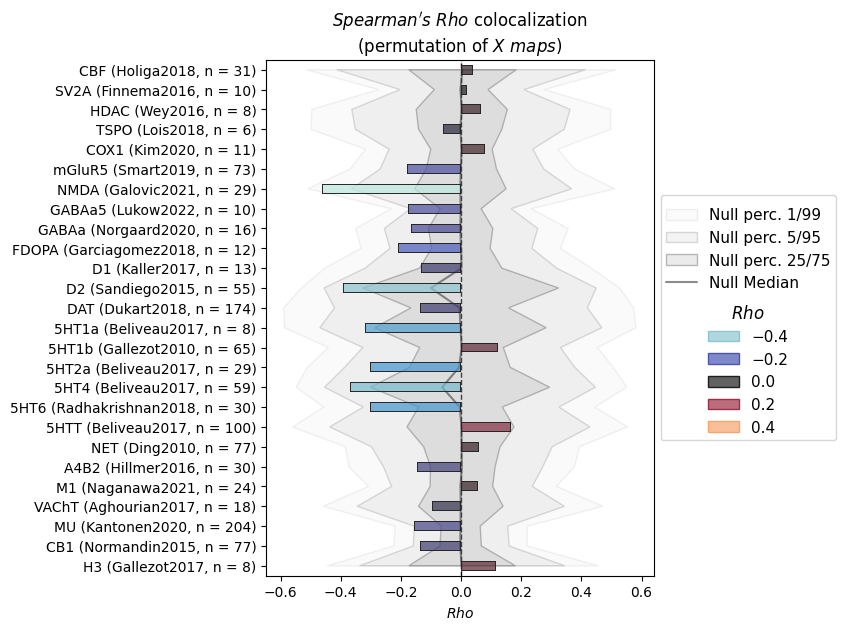

In [5]:
fig, ax, plot = nsp_object.plot("categorical")

## Group comparison

Implemented here via `nispace.workflows.group_comparison()`, this is the core functionality of the MATLAB [JuSpace](https://github.com/juryxy/JuSpace) package. The typical scenario would be: I have MRI images of two groups or sessions, which I want to compare against each other. Examples would be patients vs. controls (groups), old vs. young, (groups), the same subjects pre- vs post treatment (sessions), or during rest vs. during a task (sessions).

The approach applies the following principle: We take each subject's image, we calculate a group/session comparison statistic for each parcel, and then we calculate colocalization statistics using the parcel-wise group/session comparison values. The last part equals the `simple_colocalization()` method above. However, here, we have single-subject maps, so we can permute the groups instead of the maps, which actually better fits our null hypothesis and is less conservative.

We use the ABIDE example dataset. Here, we get parcellated data ("fALFF") for many ASD- and control-subjects along with phenotypic information.

The minimum data we have to provide is the parcellated data via "x" and the group information via "design". The framework is actually no GLM but is implemented in a GLM-style to match what people already use in neuroimaging analysis. So, the "design" should be a DataFrame with as many rows as there are subjects plus minimally a dummy column named "groups". Another specially treated column is "site" for scanner/study site. If we pass nothing else, everything including the "site" column will be regressed from the parcel-wise data. If we pass `combat = True`, ComBat harmonization will be used to remove site effects.

The group comparison method determines the output format. Following the ENIGMA example above, we can a group-level effect size (`"cohen(a,b)"`or `"hedges(a,b)"`), which will result in one group comparison map, which will be colocalized with the reference dataset. On the other hand, we can use `"zscore(a,b)"` to calculate z scores for every subject in group A (lowest value in the "group" design column) vs. mean and sd of group B. This will result in one map for every subject in group A, to be colocalized with the reference dataset. While we then could calculate one p value for every subject, the default is to calculate p values for the mean of all colocalization values across group-A-subject for easier interpretation.

Let's start with version 1 and `"hedges"`:

INFO | 12/06/24 12:15:49 | nispace: Loading example dataset: abide
INFO | 12/06/24 12:15:49 | nispace: The abide dataset was parcellated using the Schaefer200MelbourneS1 parcellation.
INFO | 12/06/24 12:15:49 | nispace: Returning parcellated and associated subject data.
A pd.DataFrame with single-subject values for 216 Schaefer/Melbourne parcels:


,1_RH_SC_HIP,2_RH_SC_AMY,3_RH_SC_pTHA,4_RH_SC_aTHA,5_RH_SC_NAc,6_RH_SC_GP,7_RH_SC_PUT,8_RH_SC_CAU,9_LH_SC_HIP,10_LH_SC_AMY,...,207_RH_CX_Default,208_RH_CX_Default,209_RH_CX_Default,210_RH_CX_Default,211_RH_CX_Default,212_RH_CX_Default,213_RH_CX_Default,214_RH_CX_Default,215_RH_CX_Default,216_RH_CX_Default
subject,,,,,,,,,,,,,,,,,,,,,
50003,0.550379,0.556799,0.558175,0.565839,0.553342,0.519940,0.538905,0.553295,0.545913,0.554257,...,0.511879,0.546551,0.572870,0.489960,0.481450,0.548910,0.553655,0.630450,0.624178,0.629993
50004,0.492533,0.488670,0.497226,0.506997,0.523376,0.498707,0.508254,0.535091,0.502559,0.493528,...,0.499219,0.514022,0.495265,0.535245,0.531300,0.530919,0.544821,0.531825,0.549992,0.583247
50005,0.510875,0.521592,0.522103,0.541097,0.559628,0.521452,0.541922,0.568454,0.529922,0.523470,...,0.539904,0.570698,0.539725,0.570238,0.521150,0.535021,0.549574,0.590597,0.604462,0.599347
50006,0.528309,0.517852,0.529154,0.524831,0.531129,0.517577,0.520542,0.530846,0.522528,0.523406,...,0.553780,0.543042,0.518454,0.561790,0.522045,0.552814,0.528958,0.580796,0.581530,0.590443
50007,0.552136,0.558819,0.555877,0.571004,0.583195,0.536471,0.572627,0.581086,0.541815,0.538237,...,0.584967,0.598638,0.561605,0.603095,0.533502,0.589898,0.550674,0.575307,0.609521,0.621164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51583,0.606648,0.596557,0.615527,0.624570,0.617553,0.628025,0.625995,0.630555,0.613172,0.601182,...,0.527415,0.604819,0.615474,0.633853,0.594164,0.629415,0.588908,0.623795,0.635083,0.664281
51584,0.588702,0.606526,0.612042,0.608508,0.612316,0.603042,0.612279,0.612225,0.600341,0.616339,...,0.534163,0.603108,0.600714,0.634309,0.609171,0.615166,0.625292,0.677136,0.687916,0.703988
51585,0.640180,0.632175,0.694205,0.704491,0.641283,0.652148,0.647305,0.644423,0.629050,0.620483,...,0.593494,0.663652,0.659141,0.666238,0.628687,0.666653,0.640163,0.671536,0.675054,0.712296


A pd.DataFrame for the design with group and site information in numerical format:


,groups,site,age,sex
0,1,9,24.45,1
1,1,9,19.09,1
2,1,9,13.73,2
3,1,9,13.37,1
4,1,9,17.78,1
...,...,...,...,...
866,1,10,35.00,1
867,1,10,49.00,1
868,1,10,27.00,1
869,1,5,29.00,2


INFO | 12/06/24 12:15:49 | nispace: Using integrated parcellation Schaefer200MelbourneS1.
INFO | 12/06/24 12:15:49 | nispace: Loading integrated pet dataset as X data.
INFO | 12/06/24 12:15:49 | nispace: Using collection UniqueTracers.
INFO | 12/06/24 12:15:49 | nispace: Loading pet maps.
INFO | 12/06/24 12:15:49 | nispace: Applying collection filter from: /Users/llotter/nispace-data/reference/pet/collection-UniqueTracers.json.
INFO | 12/06/24 12:15:49 | nispace: Loading parcellated data: Schaefer200MelbourneS1

The NiSpace "PET" dataset is based on openly available nuclear imaging maps from various independent sources.
The accompanying metadata table contains detailed information about tracers, source samples, original publications and data 
sources, as well as the publication licenses. The licenses determine in which contexts the maps can be used. Every map, 
except for those with a "free" or "CC0 1.0" license, must be cited when used. The responsibility for this lies with the user!


Parcellating (-1 proc): 100%|██████████| 1/1 [00:00<00:00, 1623.81it/s]


INFO | 12/06/24 12:15:51 | nispace: Combined across images, 0 parcels had only background intensity and were set to nan (indices: []).
INFO | 12/06/24 12:15:51 | nispace: Got 'z' data for 1 x 216 parcels.
INFO | 12/06/24 12:15:51 | nispace: Z-standardizing 'X' data.
INFO | 12/06/24 12:15:51 | nispace: Z-standardizing 'Z' data.
INFO | 12/06/24 12:15:51 | nispace: Design matrix of shape (871, 4). Assuming 871 subjects/maps.


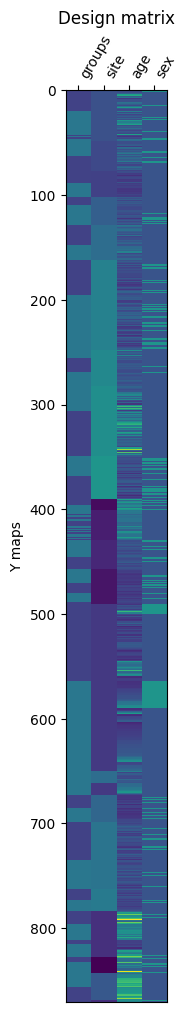

INFO | 12/06/24 12:15:52 | nispace: *** NiSpace.clean_y() - Y covariate regression. ***
INFO | 12/06/24 12:15:52 | nispace: Performing covariate regression between maps/subjects (e.g., age, sex, site).
INFO | 12/06/24 12:15:52 | nispace: Assuming 3 'between' covariate(s) for 871 maps/subjects.


Regressing 3 between covariate(s) on Y (-1 proc): 100%|██████████| 216/216 [00:01<00:00, 166.94it/s]


INFO | 12/06/24 12:15:57 | nispace: *** NiSpace.transform_y() - Y transformation and comparison. ***
INFO | 12/06/24 12:15:57 | nispace: Groups/sessions vector provided, ensuring dummy-coding.
INFO | 12/06/24 12:15:57 | nispace: Applying Y transform 'hedges(a,b)'.
INFO | 12/06/24 12:15:57 | nispace: *** NiSpace.colocalize() - Estimating X & Y colocalizations. ***
INFO | 12/06/24 12:15:57 | nispace: Running 'spearman' colocalization with 'hedges(a,b)' transform.
INFO | 12/06/24 12:15:57 | nispace: Will regress Z from Y before colocalization calculation.
INFO | 12/06/24 12:15:57 | nispace: Found equal number of Z and Y maps. Will perform map-wise regression.


Colocalizing (spearman, -1 proc): 100%|██████████| 1/1 [00:00<00:00, 1232.89it/s]

INFO | 12/06/24 12:15:57 | nispace: *** NiSpace.permute() - Estimate exact non-parametric p values. ***
INFO | 12/06/24 12:15:57 | nispace: Permutation of: Y groups.
INFO | 12/06/24 12:15:57 | nispace: Loading transformed Y data, transform = 'hedges(a,b)'.
INFO | 12/06/24 12:15:57 | nispace: Will calculate p values for mean calculation across Y maps. Set 'p_from_average_y_coloc' = False to change this behavior.
INFO | 12/06/24 12:15:57 | nispace: Loading observed colocalizations (method = 'spearman').
INFO | 12/06/24 12:15:57 | nispace: Generating permuted Y groups.
INFO | 12/06/24 12:15:57 | nispace: Permuting groups/sessions vector, strategy: unpaired, proportional.



Null colocalizations (spearman, -1 proc): 100%|██████████| 10000/10000 [00:01<00:00, 9397.75it/s]


INFO | 12/06/24 12:16:02 | nispace: Calculating exact p-values (tails = {'rho': 'two'}).
INFO | 12/06/24 12:16:02 | nispace: *** NiSpace.correct_p() - Correct p values for multiple comparisons. ***
INFO | 12/06/24 12:16:02 | nispace: Returning colocalizations: 
| METHOD   | XSEA  | X_REDUCTION | Y_TRANSFORM | 
| spearman | False | False       | hedges(a,b) | 
INFO | 12/06/24 12:16:02 | nispace: Returning p values: 
| METHOD   | PERMUTE_WHAT | XSEA  | MC_METHOD | NORM  | X_REDUCTION | Y_TRANSFORM | 
| spearman | groups       | False | None      | False | False       | hedges(a,b) | 
INFO | 12/06/24 12:16:02 | nispace: Returning p values: 
| METHOD   | PERMUTE_WHAT | XSEA  | MC_METHOD | NORM  | X_REDUCTION | Y_TRANSFORM | 
| spearman | groups       | False | fdrbh     | False | False       | hedges(a,b) | 


In [6]:
from nispace.datasets import fetch_example
from nispace.workflows import group_comparison

# get the example
example_abide, info_abide = fetch_example("abide")
print("A pd.DataFrame with single-subject values for 216 Schaefer/Melbourne parcels:")
display(example_abide)

# define the design
design = pd.DataFrame({
    "groups": info_abide["dx_num"],
    "site": info_abide["site_num"],
    "age": info_abide["age"],
    "sex": info_abide["sex_num"]
})
print("A pd.DataFrame for the design with group and site information in numerical format:")
display(design)

# run the analysis, plot=True will directly plot the result
colocs, p_values, q_values, nsp_object = group_comparison(
    x="PET",
    design=design,
    y=example_abide,
    z="gm", # control for standard gray matter probability on map-level
    parcellation="Schaefer200MelbourneS1",
    colocalization_method="spearman", # can be any allowed method
    group_comparison="hedges(a,b)",
    n_proc=-1, # number of processes, defaults to 1
    seed=42, # seed for reproducibility
    plot=False, # don't plot for now
)

make a results df as above:

In [7]:
group_results = pd.concat([colocs, p_values, q_values], keys=["rho", "p", "q"])
# reorder levels
group_results = group_results.droplevel(1, axis=0)
# show strongest effect
display(group_results.T.sort_values(by="p"))

rho   
set                     map                                                            
Dopamine                target-D2_tracer-flb457_n-55_dx-hc_pub-sandiego...  0.324506  \
Opiods/Endocannabinoids target-MU_tracer-carfentanil_n-204_dx-hc_pub-ka...  0.349517   
                        target-CB1_tracer-omar_n-77_dx-hc_pub-normandin...  0.348871   
GABA                    target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lu...  0.209059   
Serotonin               target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv...  0.275701   
                        target-5HT4_tracer-sb207145_n-59_dx-hc_pub-beli...  0.211885   
Histamine               target-H3_tracer-gsk189254_n-8_dx-hc_pub-gallez...  0.205824   
GABA                    target-GABAa_tracer-flumazenil_n-16_dx-hc_pub-n... -0.211634   
Immunity                target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020     -0.182966   
General                 target-HDAC_tracer-martinostat_n-8_dx-hc_pub-we... -0.131992   
Dopamine                target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-g...  0.107762   
                        target-DAT_tracer-fpcit_n-174_dx-hc_pub-dukart2018  0.129739   
                        target-D1_tracer-sch23390_n-13_dx-hc_pub-kaller...  0.084639   
Actylcholine            target-A4B2_tracer-flubatine_n-30_dx-hc_pub-hil...  0.115644   
General                 target-CBF_tracer-asl_n-31_dx-hc_pub-holiga2018     0.140507   
Actylcholine            target-VAChT_tracer-feobv_n-18_dx-hc_pub-aghour...  0.091068   
Serotonin               target-5HT2a_tracer-cimbi36_n-29_dx-hc_pub-beli...  0.106682   
Immunity                target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018     0.071414   
Actylcholine            target-M1_tracer-lsn3172176_n-24_dx-hc_pub-naga...  0.065986   
Glutamate               target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smar...  0.080255   
Serotonin               target-5HT1b_tracer-p943_n-65_dx-hc_pub-gallezo...  0.078817   
Noradrenaline           target-NET_tracer-mrb_n-77_dx-hc_pub-ding2010      -0.051182   
Serotonin               target-5HTT_tracer-dasb_n-100_dx-hc_pub-belivea... -0.053599   
                        target-5HT6_tracer-gsk215083_n-30_dx-hc_pub-rad...  0.031242   
Glutamate               target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic... -0.020236   
General                 target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2016 -0.005422   

                                                                                 p   
set                     map                                                          
Dopamine                target-D2_tracer-flb457_n-55_dx-hc_pub-sandiego...  0.0126  \
Opiods/Endocannabinoids target-MU_tracer-carfentanil_n-204_dx-hc_pub-ka...  0.0238   
                        target-CB1_tracer-omar_n-77_dx-hc_pub-normandin...  0.0378   
GABA                    target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lu...  0.0422   
Serotonin               target-5HT1a_tracer-cumi101_n-8_dx-hc_pub-beliv...  0.0654   
                        target-5HT4_tracer-sb207145_n-59_dx-hc_pub-beli...  0.2058   
Histamine               target-H3_tracer-gsk189254_n-8_dx-hc_pub-gallez...  0.2676   
GABA                    target-GABAa_tracer-flumazenil_n-16_dx-hc_pub-n...  0.3318   
Immunity                target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020      0.4364   
General                 target-HDAC_tracer-martinostat_n-8_dx-hc_pub-we...  0.4406   
Dopamine                target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-g...  0.5226   
                        target-DAT_tracer-fpcit_n-174_dx-hc_pub-dukart2018  0.5538   
                        target-D1_tracer-sch23390_n-13_dx-hc_pub-kaller...  0.5992   
Actylcholine            target-A4B2_tracer-flubatine_n-30_dx-hc_pub-hil...  0.6242   
General                 target-CBF_tracer-asl_n-31_dx-hc_pub-holiga2018     0.6406   
Actylcholine            target-VAChT_tracer-feobv_n-18_dx-hc_pub-aghour...  0.6854   
Serotonin               target-5HT2a_tracer-cimbi36_n-29_dx-hc_pub-b

Now, let's do it again but using `"zscore(a,b)"` as the comparison method. We suppress the output. This will take some minutes as it requires more computations.



In [8]:
# run the analysis, plot=True will directly plot the result
colocs, p_values, q_values, nsp_object = group_comparison(
    x="PET",
    design=design,
    y=example_abide,
    z="gm", # control for standard gray matter probability on map-level
    parcellation="Schaefer200MelbourneS1",
    colocalization_method="spearman", # can be any allowed method
    group_comparison="zscore(a,b)",
    n_proc=-1, # number of processes, defaults to 1
    seed=42, # seed for reproducibility
    plot=False, # don't plot for now
    plot_design=False,
    verbose=False,
)

Let's look at the results. The coloc dataframe will have ASD subjects in the rows, but the p values will have one row for the average colocalization across subjects.

In [9]:
print("Spearman colocalizations for all single ASD subjects")
display(colocs)

print("p values for the average colocalization across ASD subjects")
display(p_values)

Spearman colocalizations for all single ASD subjects


set                                             General   
map     target-CBF_tracer-asl_n-31_dx-hc_pub-holiga2018   
subject                                                   
50003                                         -0.407855  \
50004                                         -0.283680   
50005                                         -0.263323   
50006                                         -0.331373   
50007                                          0.032604   
...                                                 ...   
51583                                          0.031813   
51584                                          0.014489   
51585                                          0.114766   
51606                                          0.023424   
51607                                          0.185787   

set                                                          
map     target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2016   
subject                                                      
50003                                            -0.034417  \
50004                                            -0.068145   
50005                                            -0.026535   
50006                                            -0.040044   
50007                                             0.090916   
...                                                    ...   
51583                                            -0.050632   
51584                                             0.063700   
51585                                            -0.048352   
51606                                            -0.167558   
51607                                            -0.000481   

set                                                            
map     target-HDAC_tracer-martinostat_n-8_dx-hc_pub-wey2016   
subject                                                        
50003                                             0.028094    \
50004                                            -0.181084     
50005                                            -0.098602     
50006                                            -0.078430     
50007                                             0.036530     
...                                                    ...     
51583                                            -0.065198     
51584                                             0.156958     
51585                                            -0.106717     
51606                                            -0.096125     
51607                                            -0.191780     

set                                            Immunity   
map     target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018   
subject                                                   
50003                                          0.129302  \
50004                                         -0.324897   
50005                                          0.043225   
50006                                         -0.079602   
50007                                          0.019743   
...                                                 ...   
51583                                          0.274384   
51584                                         -0.206073   
51585                                          0.287662   
51606                                         -0.059079   
51607                                          0.161191   

set                                                      
map     target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020   
subject                                                  
50003                                         0.325448  \
50004                                        -0.440435   
50005                                        -0.072024   
50006                                        -0.028093   
50007                                        -0.182615   
...                                                ...   
51583                                        -0.016208   


p values for the average colocalization across ASD subjects


set                                          General   
map  target-CBF_tracer-asl_n-31_dx-hc_pub-holiga2018   
mean                                           0.274  \

set                                                       
map  target-SV2A_tracer-ucbj_n-10_dx-hc_pub-finnema2016   
mean                                             0.5048  \

set                                                         
map  target-HDAC_tracer-martinostat_n-8_dx-hc_pub-wey2016   
mean                                             0.5266    \

set                                         Immunity   
map  target-TSPO_tracer-pbr28_n-6_dx-hc_pub-lois2018   
mean                                          0.6464  \

set                                                   
map  target-COX1_tracer-ps13_n-11_dx-hc_pub-kim2020   
mean                                         0.2942  \

set                                             Glutamate   
map  target-mGluR5_tracer-abp688_n-73_dx-hc_pub-smart2019   
mean                                              0.315    \

set                                                        
map  target-NMDA_tracer-ge179_n-29_dx-hc_pub-galovic2021   
mean                                             0.9972   \

set                                                    GABA   
map  target-GABAa5_tracer-ro154513_n-10_dx-hc_pub-lukow2022   
mean                                              0.005      \

set                                                               
map  target-GABAa_tracer-flumazenil_n-16_dx-hc_pub-norgaard2020   
mean                                             0.3186          \

set                                                       Dopamine  ...   
map  target-FDOPA_tracer-fluorodopa_n-12_dx-hc_pub-garciagomez2018  ...   
mean                                              0.499             ...  \

set                                                Serotonin   
map  target-5HT4_tracer-sb207145_n-59_dx-hc_pub-beliveau2017   
mean                                             0.0908       \

set                                                                  
map  target-5HT6_tracer-gsk215083_n-30_dx-hc_pub-radhakrishnan2018   
mean                                             0.4518             \

set                                                         
map  target-5HTT_tracer-dasb_n-100_dx-hc_pub-beliveau2017   
mean                                             0.6692    \

set                                  Noradrenaline   
map  target-NET_tracer-mrb_n-77_dx-hc_pub-ding2010   
mean                                        0.9668  \

set                                             Actylcholine   
map  target-A4B2_tracer-flubatine_n-30_dx-hc_pub-hillmer2016   
mean                                             0.2068       \

set                                                            
map  target-M1_tracer-lsn3172176_n-24_dx-hc_pub-naganawa2021   
mean                                              0.218       \

set                                                           
map  target-VAChT_tracer-feobv_n-18_dx-hc_pub-aghourian2017   
mean                                              0.451      \

set                                    Opiods/Endocannabinoids   
map  target-MU_tracer-carfentanil_n-204_dx-hc_pub-kantonen2020   
mean                                             0.0056         \

set                                                        
map  target-CB1_tracer-omar_n-77_dx-hc_pub-normandin2015   
mean                                             0.0126   \

set                                              Histamine  
map  target-H3_tracer-gsk189254_n-8_dx-hc_pub-gallezot2017  
mean                                             0.0554     

[1 rows x 26 columns]

When we plot this, `NiSpace` will automatically detect the colocalization dataframe structure and adjust the plotting style:

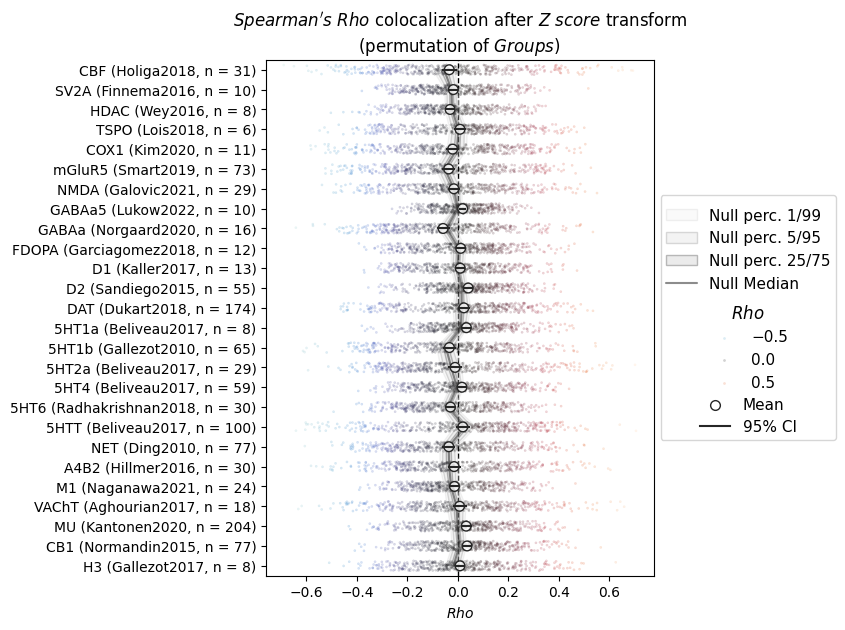

In [10]:
fig, ax, plot = nsp_object.plot("categorical")

## Simple X-set enrichment analysis

Gene-set enrichment analyses (GSEA) are "an old head" as we say in Germany (I actually have no idea, but I am confident that this means something else in English). They usually answer the question: "Is an input set of genes over-represented in one or more other sets of genes (e.g., markers of certain cell types or disorders) as compared to a much larger "background" gene set. 

For the neuroimaging and "colocalization" space, the concept was introduced (by others first, not my idea) as a way to test if a brain map is more correlated to the brain/cortex-wide distribution of a set of genes than to other random genes. We do exactly that here. However, we call this "XSEA" as I generalized the concept to any kind of reference map dataset that is sorted into sub-categories ("sets"). Therefore, `NiSpace` requires the input reference data have an at least 2d-multiindex with at least 2 levels: `"map"` and `"set"`. When `"mrna"` is the x dataframe, subset by a collection (automatically: cell type markers), the function will automatically use the full gene expression dataset as background.

We use the ENIGMA example data from above.

In [11]:
from nispace.workflows import simple_xsea

# run the analysis, plot=True will directly plot the result
colocs, p_values, q_values, nsp_object = simple_xsea(
    x="mrna",
    y=example_enigma,
    z=None, # don't control for anything on map-level
    parcellation="DesikanKilliany",
    colocalization_method="spearman", # can be any allowed method
    xsea_aggregation_method="mean",
    n_proc=-1, # number of processes, defaults to 1
    seed=42, # seed for reproducibility
    plot=False, # don't plot for now
)

INFO | 12/06/24 12:22:10 | nispace: Trying to fetch background X dataset.
INFO | 12/06/24 12:22:10 | nispace: Loading mrna maps.
INFO | 12/06/24 12:22:10 | nispace: Loading parcellated data: DesikanKilliany
INFO | 12/06/24 12:22:10 | nispace: Standardizing parcellated data.

The NiSpace "mRNA" dataset is based on Allen Human Brain Atlas (AHBA) gene expression data published in Hawrylycz et al., 2015
(https://doi.org/10.1038/nn.4171). The AHBA dataset consists of mRNA expression data from postmortem brain tissue of 6 donors, 
mapped into imaging space using the abagen toolbox (Markello et al., 2021, https://doi.org/10.7554/eLife.72129).
In addition to those two publications, please cite publications associated with gene set collections as appropriate.


INFO | 12/06/24 12:22:10 | nispace: Using integrated parcellation DesikanKilliany.
INFO | 12/06/24 12:22:10 | nispace: Loading integrated mrna dataset as X data.
INFO | 12/06/24 12:22:10 | nispace: Using collection CellTypesPsychEncodeTP

Colocalizing (spearman, -1 proc): 100%|██████████| 1/1 [00:00<00:00, 1010.19it/s]

INFO | 12/06/24 12:22:11 | nispace: *** NiSpace.permute() - Estimate exact non-parametric p values. ***
INFO | 12/06/24 12:22:11 | nispace: Permutation of: X sets.
INFO | 12/06/24 12:22:11 | nispace: Loading observed colocalizations (method = 'spearman').
INFO | 12/06/24 12:22:11 | nispace: Generating permuted X sets.
INFO | 12/06/24 12:22:11 | nispace: Will use 15633 provided background maps.
INFO | 12/06/24 12:22:11 | nispace: Generating permuted X set indices.



Null colocalizations (spearman, -1 proc): 100%|██████████| 10000/10000 [00:11<00:00, 873.49it/s]


INFO | 12/06/24 12:22:26 | nispace: Calculating exact p-values (tails = {'rho': 'two'}).
INFO | 12/06/24 12:22:26 | nispace: *** NiSpace.correct_p() - Correct p values for multiple comparisons. ***
INFO | 12/06/24 12:22:26 | nispace: Returning colocalizations: 
| METHOD   | XSEA | X_REDUCTION | Y_TRANSFORM | 
| spearman | True | False       | False       | 
INFO | 12/06/24 12:22:26 | nispace: Returning p values: 
| METHOD   | PERMUTE_WHAT | XSEA | MC_METHOD | NORM  | X_REDUCTION | Y_TRANSFORM | 
| spearman | sets         | True | None      | False | False       | False       | 
INFO | 12/06/24 12:22:26 | nispace: Returning p values: 
| METHOD   | PERMUTE_WHAT | XSEA | MC_METHOD | NORM  | X_REDUCTION | Y_TRANSFORM | 
| spearman | sets         | True | fdrbh     | False | False       | False       | 


The results DataFrames will have as many columns as there are sets (about 20 for cell type collections), not as there are genes:

In [12]:
print("Spearman colocalizations after gene-set enrichment analysis")
display(colocs)

print("Set-permutation p-values of the colocalizations after gene-set enrichment analysis")
display(p_values)

Spearman colocalizations after gene-set enrichment analysis


,Adult-Ex1,Adult-Ex2,Adult-Ex3,Adult-Ex4,Adult-Ex5,Adult-Ex6,Adult-Ex7,Adult-Ex8,Adult-In1,Adult-In2,...,Adult-In7,Adult-In8,Adult-Astro,Adult-Endo,Dev-quiescent,Dev-replicating,Adult-Micro,Adult-OtherNeuron,Adult-OPC,Adult-Oligo
SCZ,-0.271778,0.005864,-0.0806,-0.182517,-0.243149,0.115124,-0.057542,-0.018476,0.006299,0.039649,...,-0.160451,0.000192,0.169107,0.057255,0.04756,0.045006,0.104339,-0.016215,0.058473,0.032612


Set-permutation p-values of the colocalizations after gene-set enrichment analysis


,Adult-Ex1,Adult-Ex2,Adult-Ex3,Adult-Ex4,Adult-Ex5,Adult-Ex6,Adult-Ex7,Adult-Ex8,Adult-In1,Adult-In2,...,Adult-In7,Adult-In8,Adult-Astro,Adult-Endo,Dev-quiescent,Dev-replicating,Adult-Micro,Adult-OtherNeuron,Adult-OPC,Adult-Oligo
SCZ,0.0001,0.9288,0.2716,0.0048,0.0002,0.0162,0.5094,0.405,0.9712,0.7792,...,0.0408,0.9366,0.0002,0.123,0.6044,0.514,0.1036,0.501,0.2396,0.6252


Let's plot the result for schizophrenia:

INFO | 12/06/24 12:22:26 | nispace: *** NiSpace.plot() - Plot colocalization results. ***
INFO | 12/06/24 12:22:27 | nispace: Creating categorical plot for method spearman, colocalization stat rho.


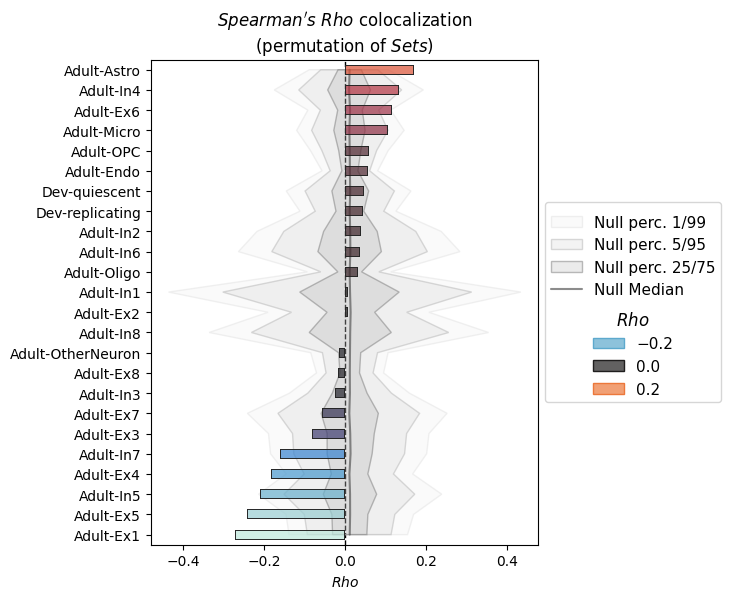

In [13]:
fig, ax, plot = nsp_object.plot("categorical", plot_kwargs={"sort_categories": True})